In [15]:
from qdisk.model import Keplerian_velocity
from qdisk.classes import FitsImage
import eDiskplot as eplot
import analysis_utils as au
from eDisk_source_dict import source_dict
import numpy as np
import matplotlib.pyplot as plt
from qdisk.product import calculate_pvdiagram
from astropy.visualization import AsinhStretch
import matplotlib
cmap = matplotlib.cm.get_cmap("RdBu")
red = cmap(0.2)
blue = cmap(0.8)

%matplotlib widget
%load_ext autoreload
%autoreload 2

source = "L1489IRS"
config = "SBLB"
line = "SO"
robust = 1.0
center_coord = source_dict[source]["radec"]
PA = source_dict[source]["PA"]
incl = source_dict[source]["incl"]
distance = source_dict[source]["distance"]
vsys = source_dict[source]["v_sys"]

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


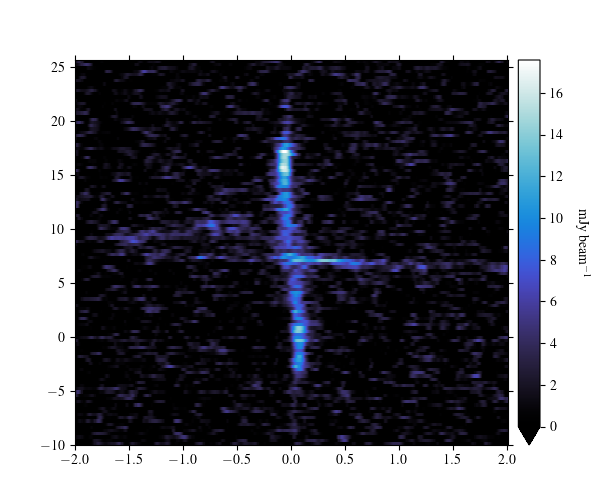

In [17]:
from qdisk.plot import PVDiagram 

PA = 88.56

fig, ax = plt.subplots(1, 1, figsize=(6, 5), dpi=100)

pvfitsname = au.VADPpath + au.get_image_basename(source, config, line, robust=robust).replace(".fits", "_pvDiagram_PA{}.fits".format(PA))
pvdiag = PVDiagram(pvfitsname, ax=ax, data_scaling_factor=1e3)
pvdiag.plot_colormap(cmap=eplot.cmap["M0"], vmin=0.0)#, stretch=AsinhStretch(a=0.1))
pvdiag.add_colorbar(label="mJy beam$^{-1}$", labelpad=20)

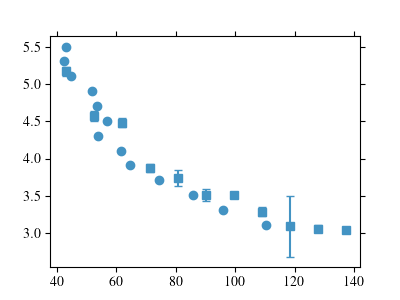

In [9]:
xcut_filename = "./SLAM/figure/L1489IRS_SBLB_C18O_robust_1.0.image_pvDiagram_PA67.2_threshold5.0sigma_ridgemodegauss_xlim0.0arcsec-5.0arcsec_vlim3kms-15kms_xcut_singlePower.ridge.dat"
vcut_filename = "./SLAM_fork/figure/L1489IRS_SBLB_C18O_robust_1.0_dv0.2.image_pvDiagram_PA67.2_threshold5.0sigma_ridgemodequad_xlim0.0arcsec-1.0arcsec_vlim2kms-15kms_vcut_adjacent2chan_vsysFree_singlePower.ridge.dat"

fig, ax = plt.subplots(figsize=(4, 3))

for filename in [xcut_filename, vcut_filename]:
    data = np.loadtxt(filename, unpack=True)
    x, x_err, v, v_err = data
    ndata = data.shape[1]


    ### plot
    for i in range(ndata):
        if v[i] < 0.0:
            ax.errorbar(
                np.abs(x[i]),
                np.abs(v[i]),
                yerr=v_err[i],
                fmt="o" if filename == xcut_filename else "s",
                capsize=3,
                color=red if v[i] > 0.0 else blue,

            )

51.31474419476634
[ 108.68095216  100.38368604   87.1957614    80.17541779   76.17043399
   66.09188149   63.06043319   57.4768596    52.87317387   51.31474419
   45.8221433    45.68712582 -110.43776247  -96.03756099  -85.77329882
  -74.32740055  -64.51398557  -61.70195216  -53.69921674  -56.74444974
  -53.45023136  -51.74177033  -44.87914127  -42.44979646  -43.24777301] [ 3.09137943  3.29137944  3.49137945  3.69137945  3.89137946  4.09137946
  4.29137947  4.49137948  4.69137948  4.89137949  5.0913795   5.2913795
 -3.10862076 -3.30862076 -3.50862077 -3.70862078 -3.90862078 -4.10862079
 -4.3086208  -4.5086208  -4.70862081 -4.90862081 -5.10862082 -5.30862083
 -5.50862083]


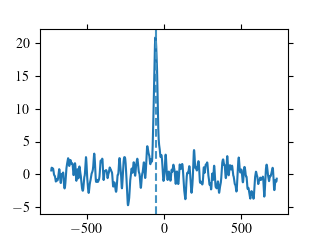

In [14]:
v_ref = vsys + 4.8
profile = pvdiag.data[np.argmin(abs(pvdiag.v - v_ref))]

plt.figure()
plt.plot(pvdiag.posax*distance, profile)

data = np.loadtxt(xcut_filename, unpack=True)
x, x_err, v, v_err = data

print(x[np.argmin(abs(v - v_ref + vsys))])

plt.axvline(
    -x[np.argmin(abs(v - v_ref + vsys))],
    0.0,
    # yerr=v_err[i],
    # fmt="o" if filename == xcut_filename else "s",
    # capsize=3,
    ls="dashed",
    color=red if v[i] > 0.0 else blue,

)
print(x, v)